<a href="https://colab.research.google.com/github/gagan3754/Elevate-Projects-/blob/main/elevate_proj_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = df.drop(columns=['id', 'Unnamed: 32'])

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [6]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [8]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [11]:
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

In [12]:
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Confusion Matrix:
 [[71  1]
 [ 3 39]]
Precision: 0.97
Recall: 0.93
ROC-AUC: 1.00


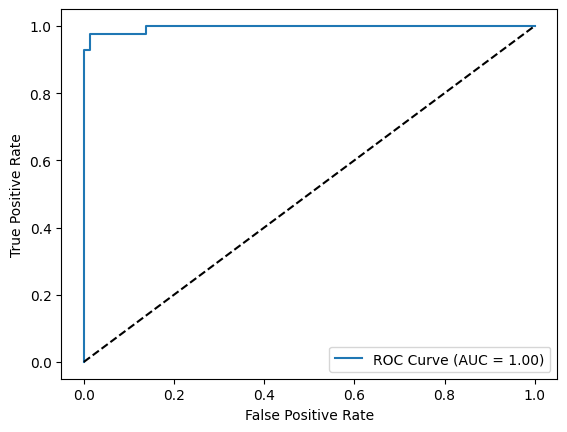

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


After lowering threshold to 0.3:
Confusion Matrix:
 [[71  1]
 [ 1 41]]
Precision: 0.98
Recall: 0.98


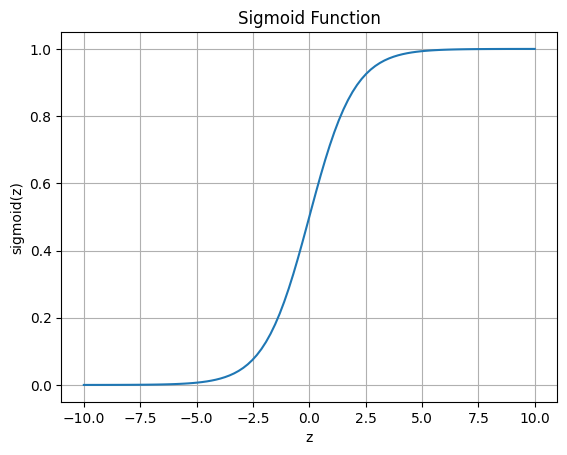

In [14]:
threshold = 0.3  # Example: lower threshold to catch more positives
y_pred_new = (y_pred_prob >= threshold).astype(int)
print("\nAfter lowering threshold to 0.3:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_new))
print(f"Precision: {precision_score(y_test, y_pred_new):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_new):.2f}")

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

example_z = np.linspace(-10, 10, 100)
plt.plot(example_z, sigmoid(example_z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()